In [42]:
%matplotlib inline

In [43]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.filtering as filtering
import thalesians.tsa.filtering.kalman as kalman
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [45]:
rnd.random_state(np.random.RandomState(seed=42), force=True);

In [67]:
X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[20., 20.], mean=20., vol=[[10., .0], [.0, 5.]])

In [68]:
X.transition

array([[ 20.,   0.],
       [-20.,  20.]])

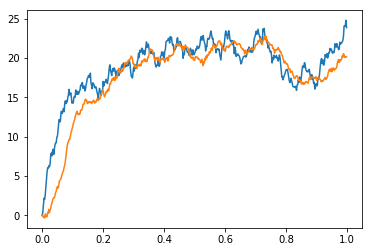

In [69]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=1., step=.002))
df = sim.run(em)
plt.plot(df);

In [70]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [71]:
ts, priors, posteriors, prior_values, posterior_values = [], [], [], [], []
for i, t in enumerate(df.index):
    ts.append(t)
    priors.append(state_observable.predict(t))
    prior_values.append(priors[-1].distr.mean.flatten())
    process_value = df.iloc[i].values
    last_observable.observe(N(process_value[-1], 0.), t)
    posteriors.append(state_observable.predict(t))
    posterior_values.append(posteriors[-1].distr.mean.flatten())
priors_df = pd.DataFrame(data=priors, index=ts)
posteriors_df = pd.DataFrame(data=posteriors, index=ts)
prior_values_df = pd.DataFrame(data=prior_values, index=ts)
posterior_values_df = pd.DataFrame(data=posterior_values, index=ts)

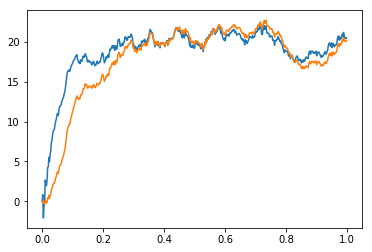

In [72]:
plt.plot(posterior_values_df);

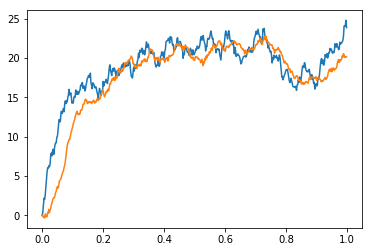

In [73]:
plt.plot(df);